In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import urllib.request

url = 'http://ergast.com/downloads/f1db_csv.zip'
filehandle, _ = urllib.request.urlretrieve(url)
zf = zipfile.ZipFile(filehandle, 'r')

results_df = pd.read_csv(zf.open('results.csv'))
drivers_df = pd.read_csv(zf.open('drivers.csv'))
lap_times_df = pd.read_csv(zf.open('lap_times.csv'))
races_df = pd.read_csv(zf.open('races.csv'))
pit_stops_df = pd.read_csv(zf.open('pit_stops.csv'))

In [2]:
raceId = lap_times_df.raceId.iloc[-1]
race_df = lap_times_df[lap_times_df["raceId"] == int(raceId)]
race_driver_df = race_df[race_df.driverId == 1].copy()
race_driver_df["delta_milliseconds"] = race_driver_df.milliseconds - race_driver_df.milliseconds.shift()
race_driver_df["delta_milliseconds"] = race_driver_df["delta_milliseconds"].fillna(0)

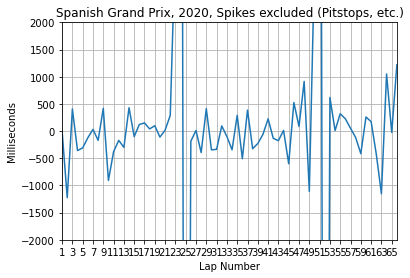

In [7]:
plt.plot(race_driver_df.lap, 
         race_driver_df.delta_milliseconds)

plt.grid()

plt.xticks(np.arange(race_df["lap"].values.min(), race_df["lap"].values.max()+1, 2.0))
plt.xlim(race_df["lap"].values.min(), race_df["lap"].values.max())
plt.ylim(-2000, 2000)

race_name = races_df[races_df["raceId"] == int(raceId)]["name"].iloc[0]
race_year = races_df[races_df["raceId"] == int(raceId)]["year"].iloc[0]
plt.title(str(race_name) + ', ' + str(race_year) + ', Spikes excluded (Pitstops, etc.)')
plt.xlabel('Lap Number')
plt.ylabel('Milliseconds')

plt.show()

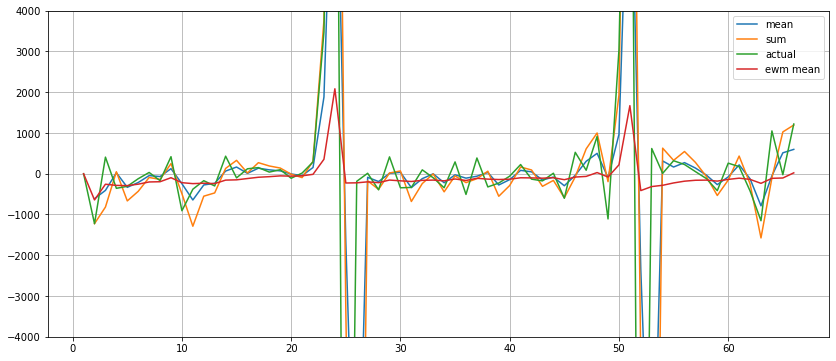

In [8]:
plt.figure(figsize=(14, 6))    


plt.plot(race_driver_df.lap, 
         race_driver_df.delta_milliseconds.rolling(2).mean(),
        label='mean')

plt.plot(race_driver_df.lap, 
         race_driver_df.delta_milliseconds.rolling(2).sum(),
        label='sum')

plt.plot(race_driver_df.lap, 
         race_driver_df.delta_milliseconds,
        label='actual')

plt.plot(race_driver_df.lap, 
         race_driver_df.delta_milliseconds.ewm(span = 20).mean(),
        label='ewm mean')

plt.ylim(-4000, 4000)
plt.grid()
plt.legend()
plt.show()

In [9]:
race_driver_df.delta_milliseconds.rolling(2).mean()

478117      NaN
478118   -612.5
478119   -409.0
478120     24.5
478121   -333.5
          ...  
478178   -124.0
478179   -787.5
478180    -51.5
478181    512.5
478182    597.0
Name: delta_milliseconds, Length: 66, dtype: float64